# IoT Traffic Simulation Analysis
This notebook analyzes SUMO detector output data.

In [10]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
# Load detector data
tree = ET.parse("iot_detector_output.xml")
root = tree.getroot()

data = []
for interval in root.findall("interval"):
    entry = {
        "loop_id": interval.get("id"),
        "time": float(interval.get("end")),
        "vehicle_count": int(interval.get("nVehContrib")),
        "speed": float(interval.get("speed")),
        "occupancy": float(interval.get("occupancy"))
    }
    data.append(entry)

df = pd.DataFrame(data)
df.head()


,loop_id,time,vehicle_count,speed,occupancy
0,loop_-E4_0,1.0,0,-1.0,0.0
1,loop_-E4_1,1.0,0,-1.0,0.0
2,loop_-E6_0,1.0,0,-1.0,0.0
3,loop_-E6_1,1.0,0,-1.0,0.0
4,loop_-E4_0,2.0,0,-1.0,0.0


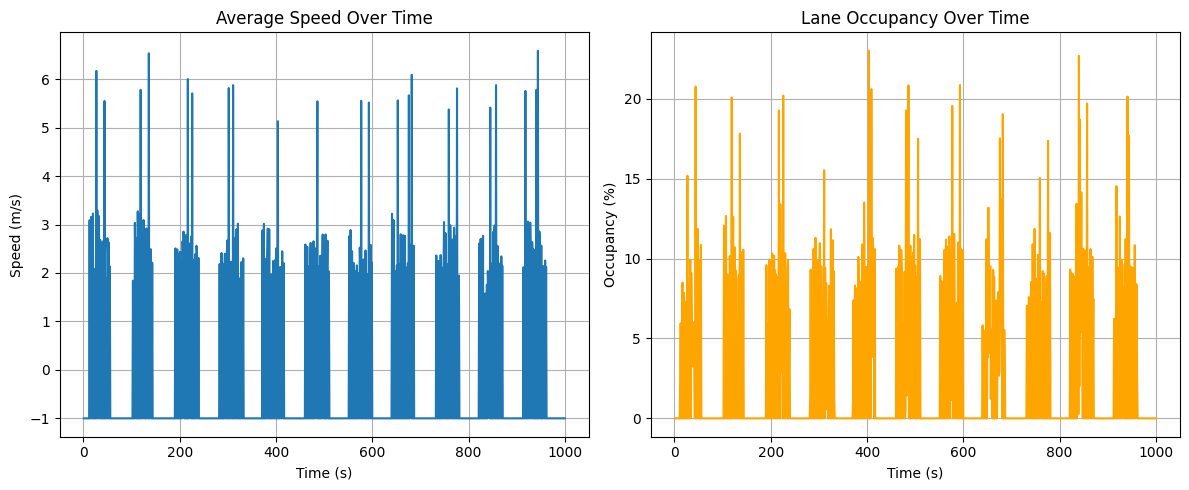

In [12]:
# Group by time and compute mean only on numeric fields
numeric_cols = ["speed", "occupancy", "vehicle_count"]
grouped = df.groupby("time")[numeric_cols].mean()

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(grouped.index, grouped["speed"], label="Speed (m/s)")
plt.title("Average Speed Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(grouped.index, grouped["occupancy"], label="Occupancy (%)", color="orange")
plt.title("Lane Occupancy Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Occupancy (%)")
plt.grid(True)

plt.tight_layout()
plt.show()
